### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- Expolatory data analysis of the given data thru Python

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment



###  Import the necessary packages

In [5]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Additional
import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

### Read the 3 csv into dataframes

In [2]:
# Import data
data = pd.read_csv("Data.csv")
movie = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

### Info, shape, describe, and find the number of missing values in the data. 

In [3]:
print('Data Shape', data.shape)
print('Movie Shape', movie.shape)
print('User Shape', user.shape)

Data Shape (100000, 4)
Movie Shape (1681, 22)
User Shape (943, 5)


In [4]:
print(data.info())
print('\n')
print(movie.info())
print('\n')
print(user.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 

In [4]:
data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,462.0,267.0,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,426.0,331.0,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,4.0,1.0,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,883528851.0,5343856.0,874724710.0,879448710.0,882826944.0,888259984.0,893286638.0


In [5]:
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [6]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [7]:
print(data.isnull().sum(),'\n')
print(user.isnull().sum(),'\n')
print(movie.isnull().sum())

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64 

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64 

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


In [8]:
print(sum(data.duplicated()))
print(sum(user.duplicated()))
print(sum(movie.duplicated()))
movie.head()

0
0
0


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Observations:**

1) There is no null and duplicate data on all 3 tables

2) Users participated in rating from age 7 to 73 and age is right skewed

3) Drama and Comedy are the 2 genre where 75th percentile of user rating

4) Genre other than Drama and Comedy less than 25th percentile of user rating


### Number of movies per genre

In [9]:
# Removing the unwanted columns
movie.loc[:,'Action':].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

**Insights:**

1) Most of the rating to the genre Comedy and Drama with 505 and 725 respectively

2) Least rating genre is Fantacy followed by Western movies

3) There are nearly equal number of audiance for Action, Romance and Thriller movies



### Drop the movie with genre is unknown 

In [10]:
# In case you need to re-run the program again
movie = pd.read_csv("item.csv")
# Movie Shape before remove
print('Movie Shape before remove unknown -',movie.shape)
# Drop unknown
print('\n',movie[["movie id",'movie title']][movie["unknown"] == 1])
movie = movie[movie["unknown"] != 1]
print('\n Movie Shape after remove unknown -,',movie.shape)

Movie Shape before remove unknown - (1681, 22)

       movie id    movie title
1371      1373  Good Morning 

 Movie Shape after remove unknown -, (1680, 22)


**Insights:**

* There is 1 movies rated Unknown which has been removed now
* 1680 - Movies after remove unknown genre

### Movies that have more than one genre 

In [11]:
# Remove movie id and release date
q6_1 = movie.drop(['movie id','release date'], axis=1)
# Set movie title as index
q6_1 = q6_1.set_index('movie title')
# Create Total
q6_1['total'] = q6_1.sum(axis=1)
# Get the count of total no of movies genre more than 1
q6_2 = q6_1[['total']][q6_1['total']>1].count()
# Sort ascending
q6_1 = q6_1['total'].sort_values(ascending=False)
q6_1

movie title
Kid in King Arthur's Court, A           6
Transformers: The Movie, The            6
Empire Strikes Back, The                6
From Dusk Till Dawn                     5
Heavy Metal                             5
                                       ..
For Love or Money                       1
Best of the Best 3: No Turning Back     1
Fog, The                                1
Microcosmos: Le peuple de l'herbe       1
Scream of Stone (Schrei aus Stein)      1
Name: total, Length: 1680, dtype: int64

In [12]:
print('The total number of movies which have more than one genre is: ',q6_2)

The total number of movies which have more than one genre is:  total    849
dtype: int64


**Insights:**

1) Total number of movies which has more than one genre is 849

2) 3 movies categorized with 6 genre

3) 11 movies categorized with 5 genre

4) Most of the movies categorized with 1 genre.


### Univariate plots of columns: 'Rating', 'Age', 'release year', 'Gender' and 'Occupation' 

In [11]:
# Get year from Release date
movie['Year'] = movie['release date'].str[-4:]
movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [13]:
# Mege all tables
df = pd.merge(user, data, on='user id')
df1 = pd.merge(df, movie, on = 'movie id')
# Split year 
df1['year'] = df1['release date'].str[-4:]
# Convert to Integer
df1['year'] = df1['year'].astype(str).astype(int)
df1.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,1994
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,1994
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,1994
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,1994
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,1994


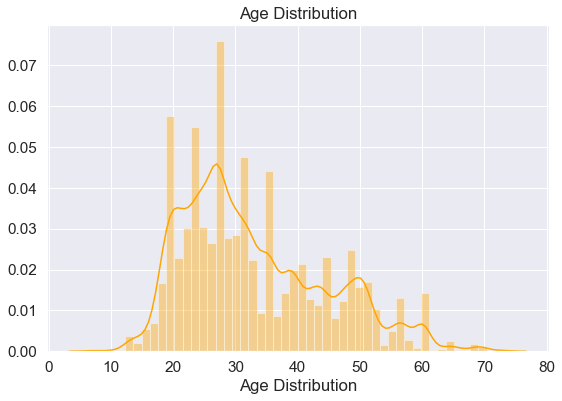

In [15]:
#Distplot Age
plt.figure (figsize = (9,6))
sns.set(font_scale=1.4)
sns.distplot(df1['age'], kde=True, color = 'Orange', axlabel='Age Distribution',    label='Age Distribution').set_title('Age Distribution')
plt.show()



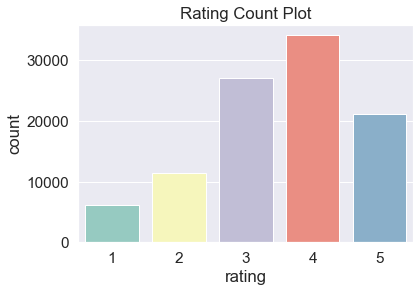

M   71.05
F   28.95
Name: gender, dtype: float64


In [18]:
sns.countplot(df1['rating'], palette='Set3').set_title('Rating Count Plot')
sns.set(font_scale=1.4)
plt.show()

gender_dist = user['gender'].value_counts(normalize = True)
print(gender_dist*100)

**Insights:**

- `Around 34% of movies are rated as 4 and 6% as 1`

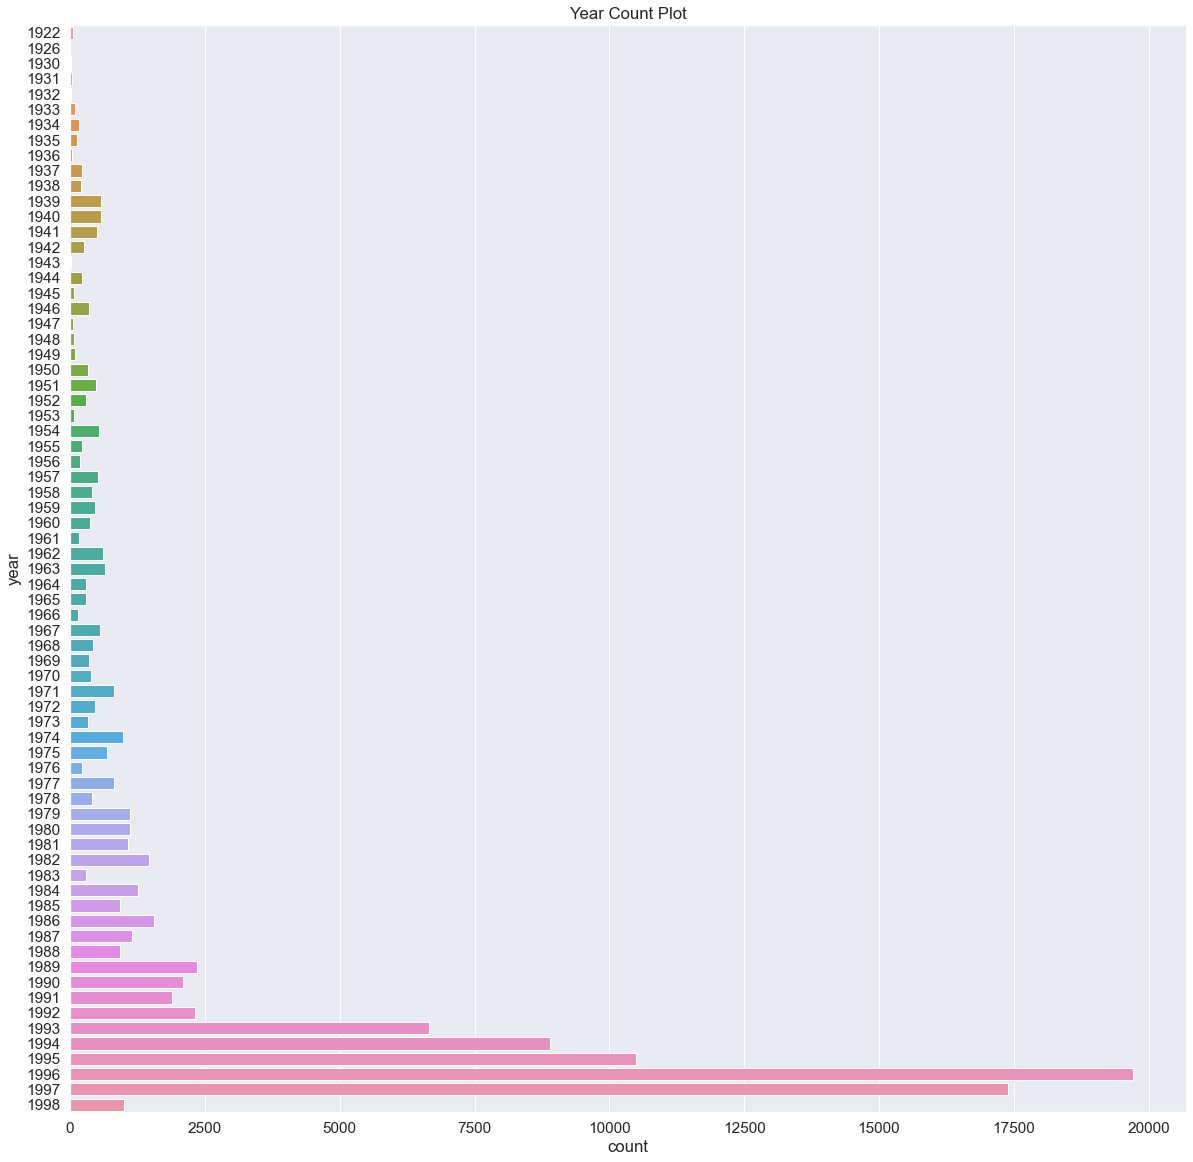

In [16]:
plt.figure (figsize = (20,20))
sns.set(font_scale=1.4)
sns.countplot(y ='year', data = df1).set_title('Year Count Plot')
plt.show()

**Insights:**

- `Significant increase in number of movies after 1990 and a sudden drop before 2000 (around 1998)`

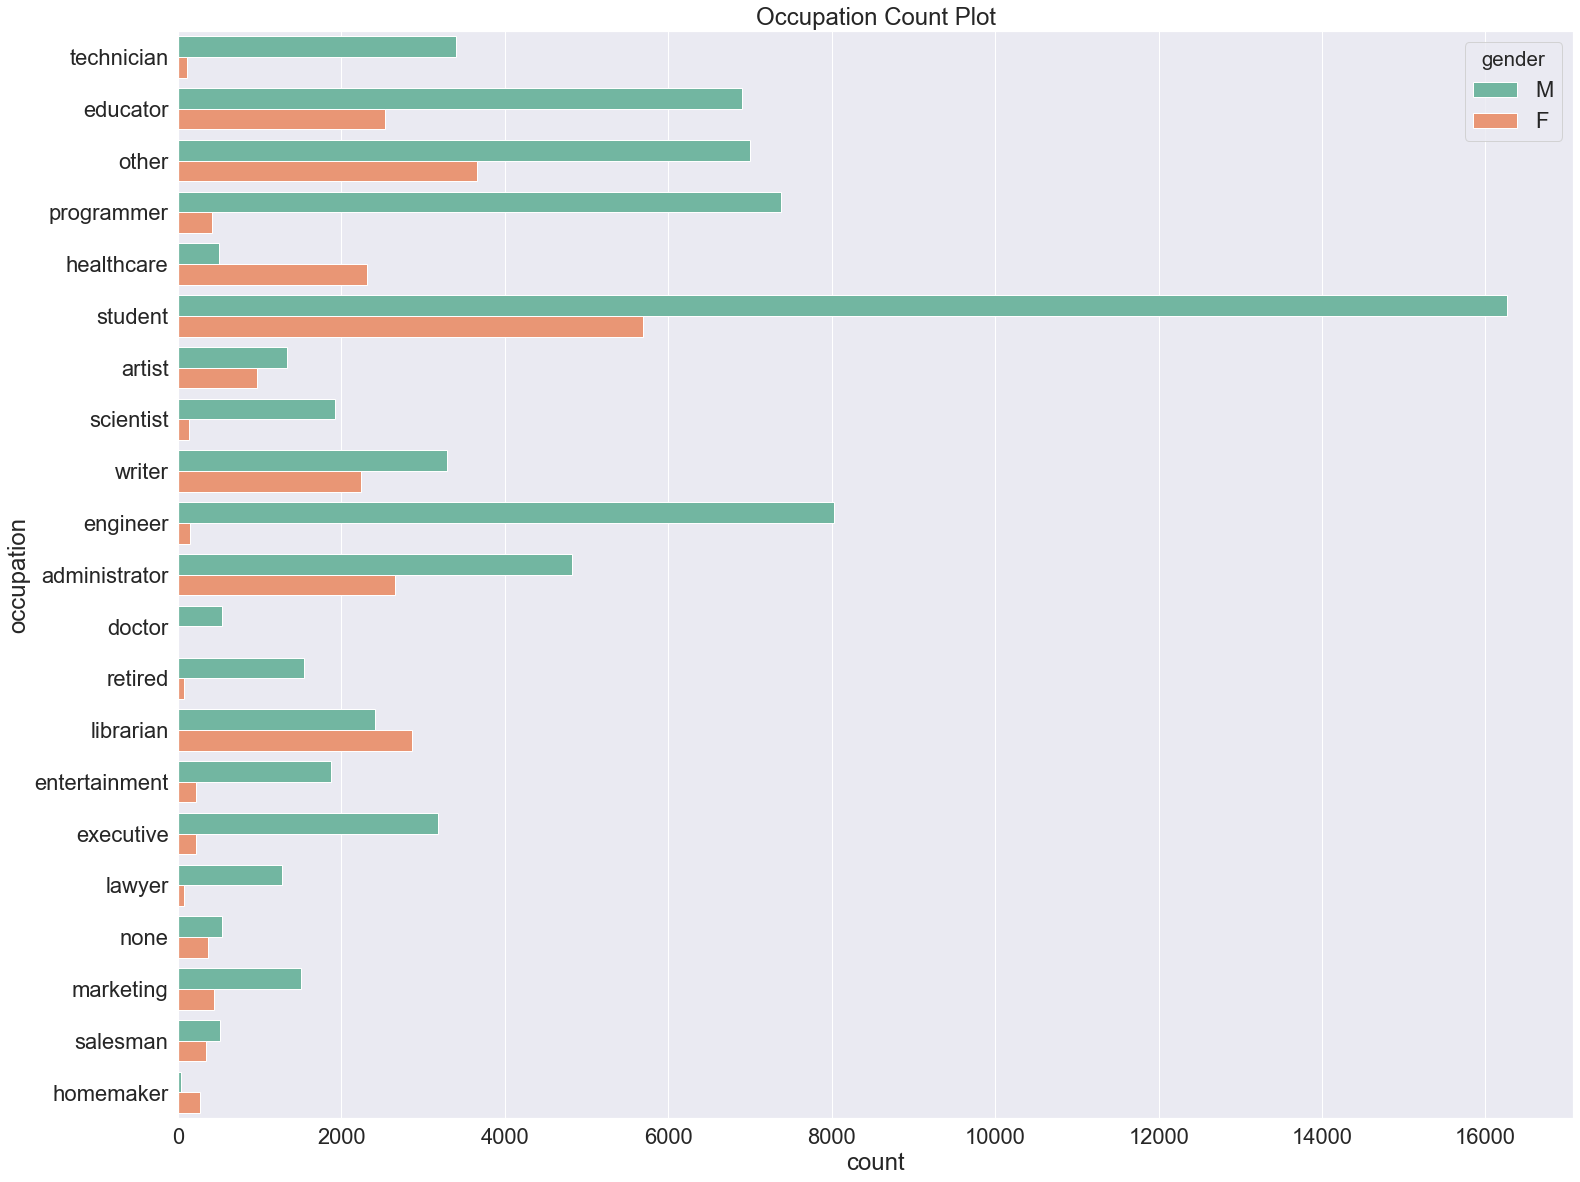

student         20.78
other           11.13
educator        10.07
administrator    8.38
engineer         7.10
programmer       7.00
librarian        5.41
writer           4.77
executive        3.39
scientist        3.29
artist           2.97
technician       2.86
marketing        2.76
entertainment    1.91
healthcare       1.70
retired          1.48
salesman         1.27
lawyer           1.27
none             0.95
homemaker        0.74
doctor           0.74
Name: occupation, dtype: float64


In [19]:
#Count plot for occupation
plt.figure (figsize = (25,20))
sns.set(font_scale=2)
sns.countplot(y='occupation', data=df1, hue = 'gender', palette='Set2').set_title('Occupation Count Plot')
plt.show()

occupation = user['occupation'].value_counts(normalize=True)
print(occupation*100)

### Visualize the popularity of genres has changed over the years 


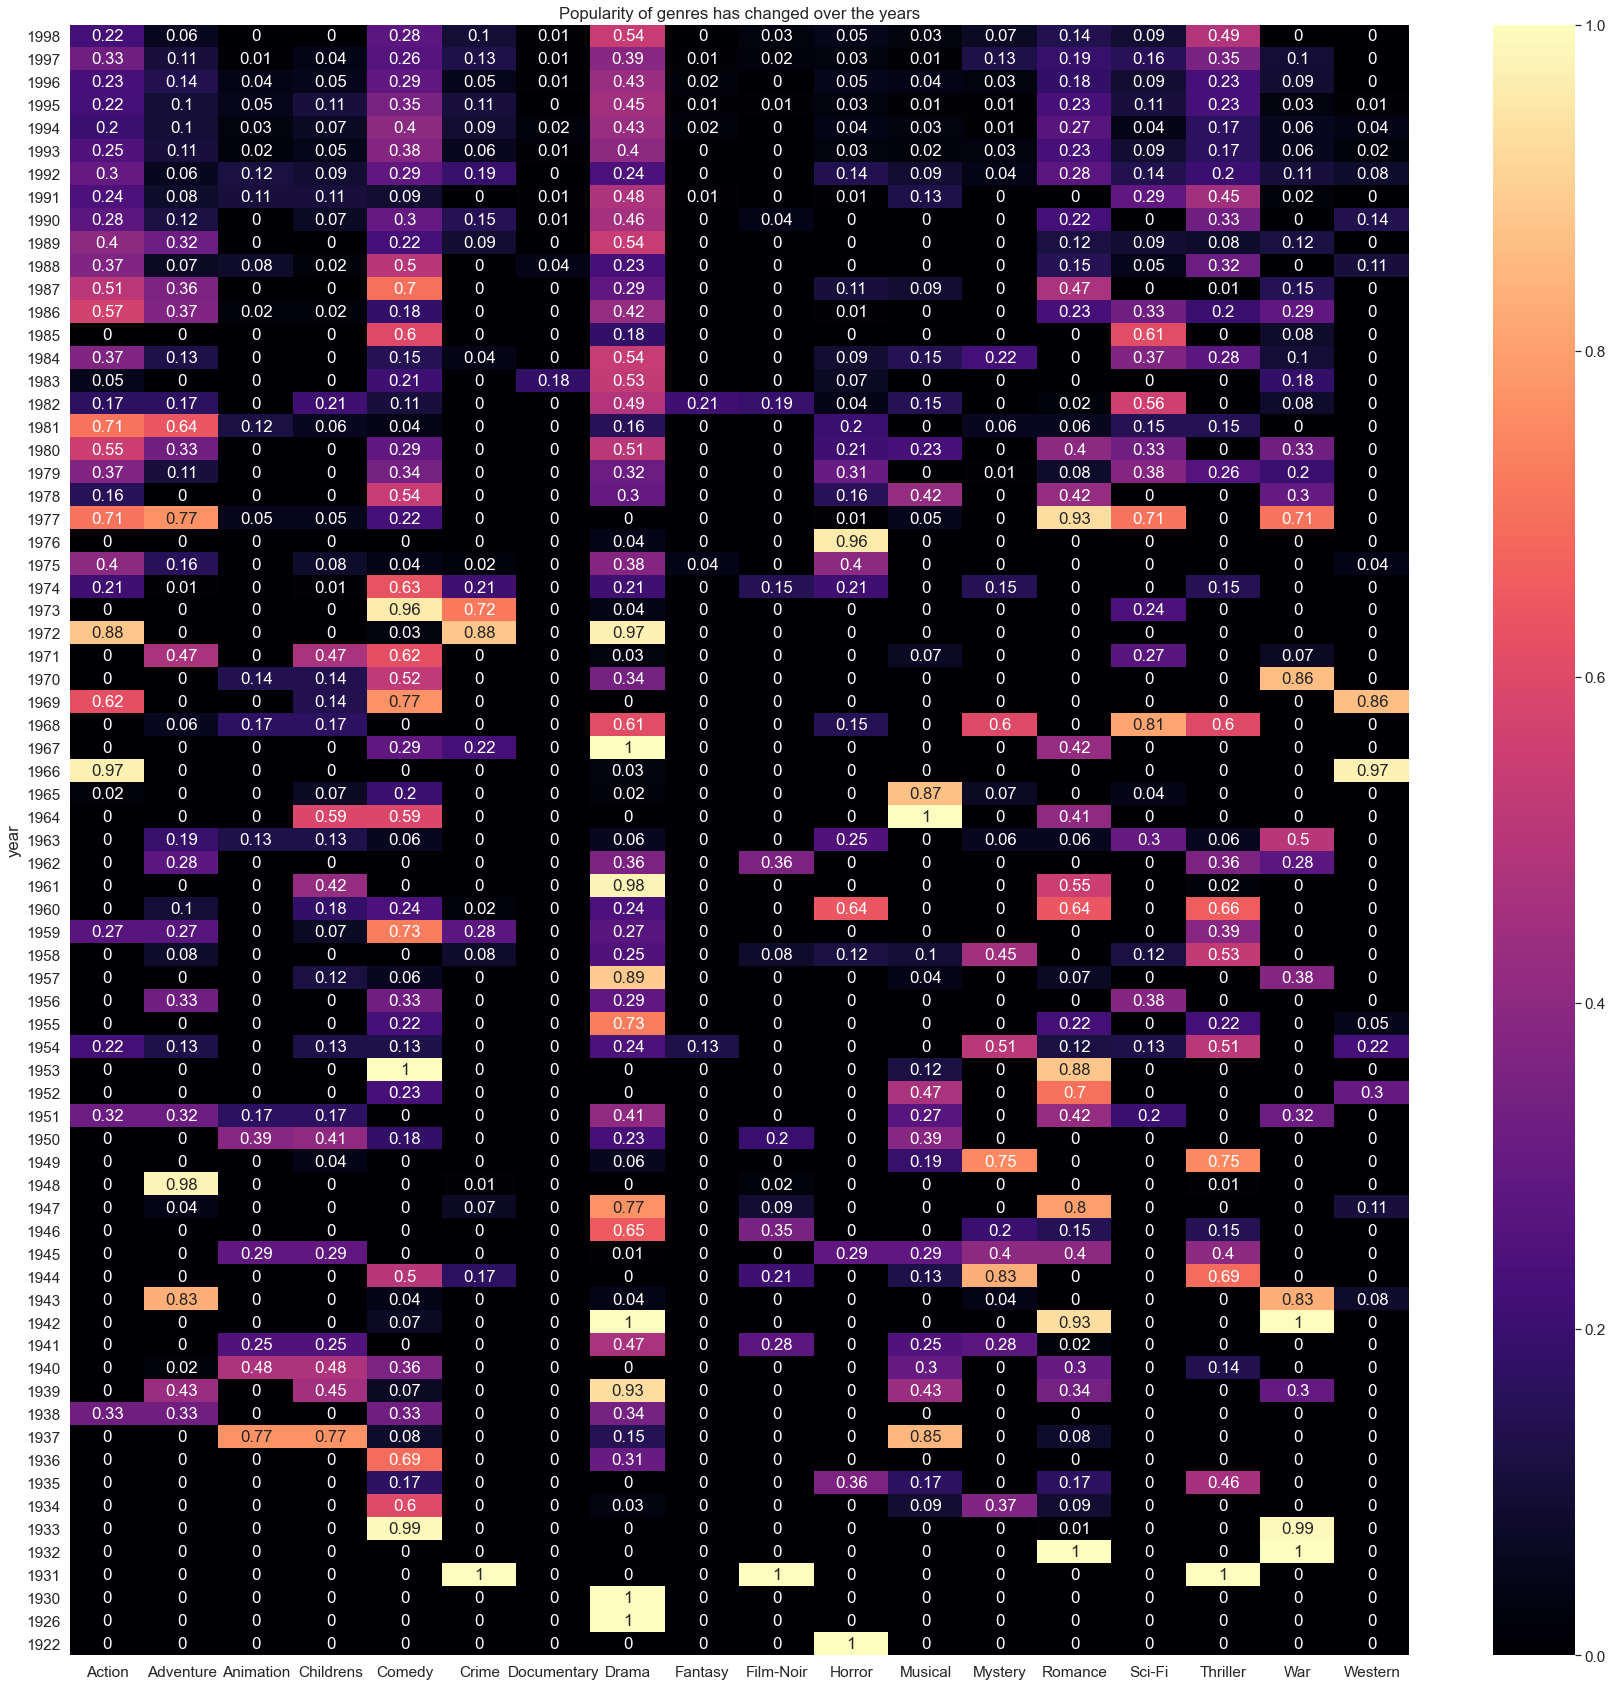

In [20]:
df1.head()
# Drop unwanted columns
q8 = df1.drop(['user id','age','gender', 'zip code','movie id', 'occupation','rating','timestamp','movie title','release date','unknown'], axis=1)
# Set year as index
q8 = q8.set_index('year')
# Mean 
q8 = q8.groupby('year').mean().round(2)
# Sort Ascending
q8.sort_index(axis=0, ascending=False, inplace=True)
plt.figure (figsize=(30,30))
sns.set(font_scale=1.4)
sns.heatmap(q8, annot=True, cmap='magma').set_title('Popularity of genres has changed over the years')
plt.show()

**Insights:**

* Action: Before 1966 action movies not famous and the trend changes after 1966 "Bat Man" movie. Post which the trend fluctuated based on the hit action movies.
* Adventure: Highest in 1938 at 25%. Popularity is consistently below 5% in the last 10 years.
* Animation: Its not popular genre and its highest popularity in 1970.
* Childrens: No consistent popularity pattern, except that it was very low in last 10 years. Some popularity can be seen for period 1959 to 1971.
* Comedy: Seems very popular. Highest popularity observed in 1936 and 1953. It has popularity between 15% to 35% in most years.
* Crime: No consistent popularity pattern, except that it was very low in last 10 years. Mostly 0. Some popularity can be seen for period 1972 to 1974.
* Documentary: Consistently 0 until 1983. After that, its mostly below 5% except in 1983.
* Drama: Extremely popular throughout the period, with popularity more than 25% in most of the years.. Highest popularity observed in 1926 and 1930.
* Fantasy: Consistently 0 until 1974. After that, its mostly below 5% except in 1975.
* Film-Noir: It was popular to some extent until 1950, with highest popularity in 1948. After that, the popularity plummated and its mostly below 3% in the last 15 years.
* Horror: It was somewhat popular between 1974 and 1987. After that it decreased and kept below 10% in the last decade.
* Musical: Somewhat popular before 1954. After that popularity decreased and kept below 6% in last decade.
* Mystery: Somewhat popular before 1950. After that popularity decreased and kept below 7% in last 3 decades.
* Romance: Fairly popular until 1963. After that popularity decreased and kept below 6% in last decade.
* Sci-Fi: Zero popularity until 1950. After that popularity increased gradually until 1968 and then decreased. After that it maintained a consistent popularity.
* Thriller: Popular until 1962, after which it lost it's popularity. Regained popularity in recent years.
* War: Popularity shows a few spikes followed by voids. It is consistently below 3% in the last decade.
* Western: Popularity shows a few spikes followed by large number of low values.

### Top 25 movies in terms of average ratings for movies that have been rated more than 100 times 

In [20]:
# Keep only necessary columns
q9 = data.drop(['user id','timestamp'], axis=1, inplace=False)
# Calculate rating count and sum
RC = q9.groupby("movie id").count()
RS =  q9.groupby("movie id").sum()
# Data Frame with Sum and Count
RA = pd.merge(RC,RS,how='inner',on='movie id')
# Calculate Average rating
RA['Avge'] = (RA['rating_y']/RA['rating_x']).round(2)
# Movies with more than 100 rated
RA = RA[RA["rating_x"] > 100]
# Sort Ascending
RA.sort_values(by="Avge",ascending=False,inplace=True)
# Get the movie tile by merge with movie
M_RA = pd.merge(RA,movie,how='inner', on='movie id')
# Top 25 
M_RA[["movie title", "Avge"]].head(25)

,movie title,Avge
0,"Close Shave, A",4.49
1,"Wrong Trousers, The",4.47
2,Schindler's List,4.47
3,Casablanca,4.46
4,"Shawshank Redemption, The",4.45
5,Rear Window,4.39
6,"Usual Suspects, The",4.39
7,Star Wars,4.36
8,12 Angry Men,4.34
9,To Kill a Mockingbird,4.29


**Insights:**

- `Popularity in drama and comedy is very fluctuating with increase in years`

- `Romance, Sci-Fi, and Thriller has been constant during last 6-7 years`

- `Western movies gained popularity over some years and then totally vanished`

### Check for the validity of the below statements 
* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

In [22]:
# Bring Drama, Romance, Sci-Fi movies and their total in to a new data frame
Drama_q10 = (df1[df1['Drama']==1].groupby(['gender'])['gender'].count()).rename('Drama')
Romance_q10 = (df1[df1['Romance']==1].groupby(['gender'])['gender'].count()).rename('Romance')
Sci_Fi_q10 = (df1[df1['Sci-Fi']==1].groupby(['gender'])['gender'].count()).rename('Sci_Fi')
Total = (df1.groupby(['gender'])['gender'].count()).rename('Total')

#Concatenate all the tables into a data frame
q10_all = pd.concat([Drama_q10,Romance_q10,Sci_Fi_q10,Total], axis=1)
q10_all['Drama %'] = (q10_all['Drama']/q10_all['Total']).round(2)
q10_all['Romance %'] = (q10_all['Romance']/q10_all['Total']).round(2)
q10_all['Sci_Fi %'] = (q10_all['Sci_Fi']/q10_all['Total']).round(2)

q10_all[['Total','Drama','Drama %', 'Romance', 'Romance %', 'Sci_Fi', 'Sci_Fi %']]

,Total,Drama,Drama %,Romance,Romance %,Sci_Fi,Sci_Fi %
gender,,,,,,,
F,25738,11008,0.43,5858,0.23,2629,0.10
M,74252,28887,0.39,13603,0.18,10101,0.14


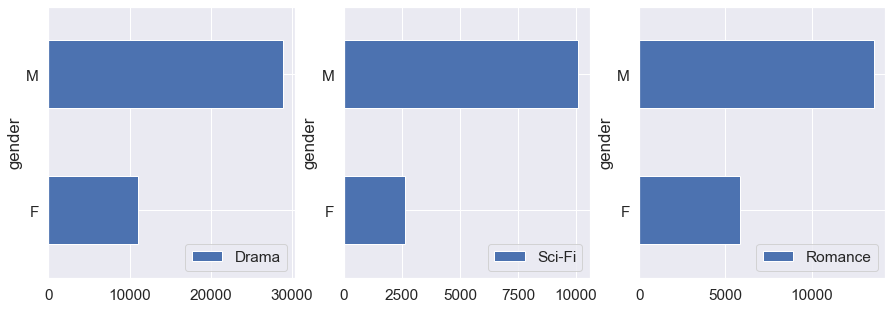

In [28]:
# Additional

# Plotting results for Drama, Sci-Fi and Romance

fig, ax = plt.subplots(ncols = 3, figsize = (15, 5))    
# Using subplots with 3 columns so that all figure are plotting in one row 

q10_all['Drama'].plot(kind='barh',label='Drama',ax=ax[0])
ax[0].legend()
# legend is used to get the labels, ax is to detemine the position of the plot
# 'barh' is for thr horizontal bar plot

q10_all['Sci_Fi'].plot(kind='barh',label='Sci-Fi',ax=ax[1])
ax[1].legend()

q10_all['Romance'].plot(kind='barh',label='Romance',ax=ax[2])
ax[2].legend()

plt.show()

**Conclusion:**
    
* `Of all the ratings given by women 43% were for Drama movies and for Men it was 39%. Therefore the statement is false. Women watch more Drama`


* `Of all the ratings given by women 10% were for Sci-FI movies and for Men it was 14%. Therefore the statement is false. Men watch more Sci-Fi`


* `Of all the ratings given by women 23% were for Drama movies and for Men it was 18%. Therefore the statement is false. Women watch more Romance`

##### ` Answer: All the statements were false.`